## Iris Flower Classification

The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.
Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.

Data set link "https://www.kaggle.com/datasets/arshid/iris-flower-dataset"

Content: 
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df=pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Displaying the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
# Exploratory Data Analysis (EDA)
print("\nDataset Information:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nClass Distribution:")
print(df['species'].value_counts())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Statistical Summary:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.9

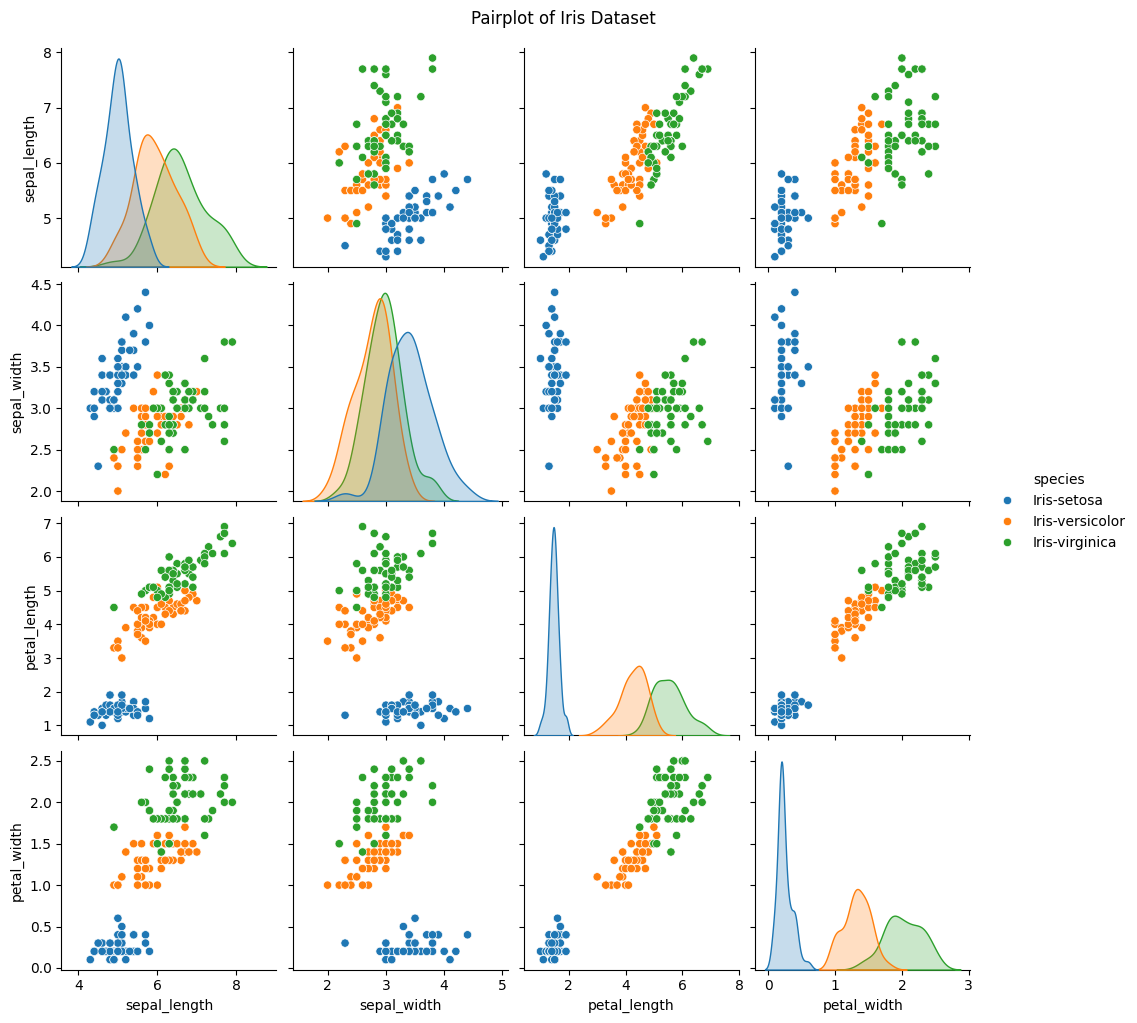

In [5]:
# Visualize the pairplot
sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

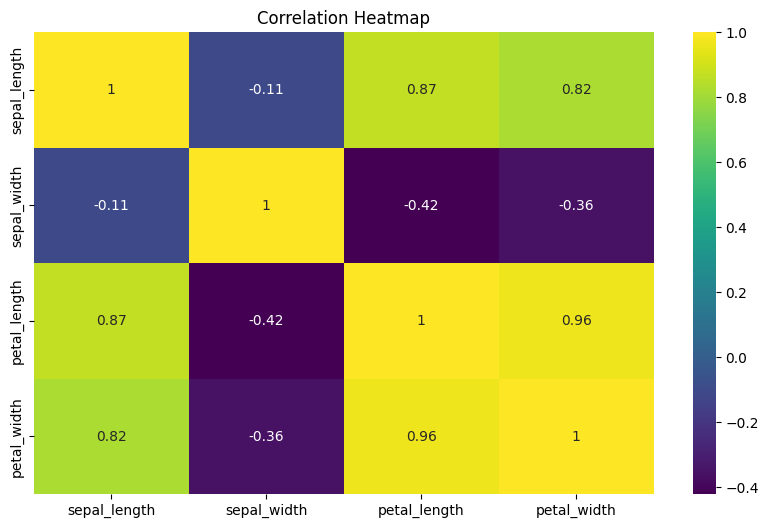

In [6]:
# Heatmap to check correlation (excluding the 'species' column)
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

In [7]:
# Split the data into features and target
X = df.drop('species', axis=1)
y = df['species']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Model Training using SVM
model = SVC(kernel='linear', random_state=42)
model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [11]:
# Model Prediction
y_pred = model.predict(X_test_scaled)

In [12]:
# Model Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [13]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")


Accuracy: 96.67%


In [15]:
# Importing additional libraries for other algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Dictionary to store model results
model_results = {}

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy * 100:.2f}%")
    # Store the result
    model_results[model_name] = accuracy

# Logistic Regression
log_reg_model = LogisticRegression(random_state=42)
train_and_evaluate_model(log_reg_model, X_train_scaled, y_train, X_test_scaled, y_test, "Logistic Regression")

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors
train_and_evaluate_model(knn_model, X_train_scaled, y_train, X_test_scaled, y_test, "K-Nearest Neighbors")

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_model(rf_model, X_train_scaled, y_train, X_test_scaled, y_test, "Random Forest")

# Compare the results
print("\nComparison of Model Accuracies:")
for model_name, accuracy in model_results.items():
    print(f"{model_name}: {accuracy * 100:.2f}%")



Model: Logistic Regression
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Accuracy: 100.00%

Model: K-Nearest Neighbors
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       